In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print(diabetes.data.shape)

(442, 10)


In [3]:
# the ground truth
print(diabetes.target.shape)

(442,)


Notes from https://scikit-learn.org/stable/datasets/index.html#datasets

5.2.3. Diabetes dataset

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Attribute Information:

    Age
    Sex
    Body mass index
    Average blood pressure
    S1
    S2
    S3
    S4
    S5
    S6


In [4]:
type(diabetes.data)
# numpy.ndarray
# get the first row i.e. row index 0, all columns

numpy.ndarray

In [5]:
diabetes.data.shape

(442, 10)

In [6]:
# basic slicing
# 1. Get first row
diabetes.data[0:1]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613]])

In [7]:
# basic slicing
# 1. Get first row
diabetes.data[0:1]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613]])

In [8]:
# 2. Get first 2 rows
diabetes.data[0:2]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405]])

In [9]:
# 3. Get column index 2, alls rows
diabetes.data[:,2]

array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
       -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215,
       -0.08380842,  0.01750591, -0.02884001, -0.00189471, -0.02560657,
       -0.01806189,  0.04229559,  0.01211685, -0.0105172 , -0.01806189,
       -0.05686312, -0.02237314, -0.00405033,  0.06061839,  0.03582872,
       -0.01267283, -0.07734155,  0.05954058, -0.02129532, -0.00620595,
        0.04445121, -0.06548562,  0.12528712, -0.05039625, -0.06332999,
       -0.03099563,  0.02289497,  0.01103904,  0.07139652,  0.01427248,
       -0.00836158, -0.06764124, -0.0105172 , -0.02345095,  0.06816308,
       -0.03530688, -0.01159501, -0.0730303 , -0.04177375,  0.01427248,
       -0.00728377,  0.0164281 , -0.00943939, -0.01590626,  0.0250506 ,
       -0.04931844,  0.04121778, -0.06332999, -0.06440781, -0.02560657,
       -0.00405033,  0.00457217, -0.00728377, -0.0374625 , -0.02560657,
       -0.02452876, -0.01806189, -0.01482845, -0.02991782, -0.04

In [13]:
# first row to compare
print(diabetes.data[0:1])
# data[rows, columns]
# 3. Get array position (0,0) ~ first row, 1st column
diabetes.data[0,0]

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]]


0.0380759064334241

In [14]:
# row index 0, columns index 3 through to 4
diabetes.data[0,3:5]

array([ 0.02187235, -0.0442235 ])

In [15]:
# rows index 0 and 1, columns index 0 and 1
# i.e. age and sex
diabetes.data[0:2,0:2]

array([[ 0.03807591,  0.05068012],
       [-0.00188202, -0.04464164]])

In [16]:
# rows index 0 and 1, columns index 0 through to 3
# i.e. age, sex, body mass index and blood pressure
diabetes.data[0:2,0:4]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783]])

In [17]:
# Note, as per documentation:
# Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times 
# n_samples (i.e. the sum of squares of each column totals 1).
#
# Really?
#
# Let's test for column index 0 i.e. age
np.sum(diabetes.data[:,0]**2)

1.0000000000000746

In [18]:
# that's near enough, now let's try for all columns
np.sum(diabetes.data[:]**2)

10.000000000000547

In [19]:
# Yip, that is also good. Can we sum individuall?
# Maybe, but let's iterate through an index first.
# We want to sum the squares of ten columns
# Note, column index 1 (Sex) is categorical, so
# mean centering and scaling does not seem applicable

for i in range(0,10):
    print("Sum of squares of column " + str(i) + " = ", np.sum(diabetes.data[:,i]**2))

Sum of squares of column 0 =  1.0000000000000746
Sum of squares of column 1 =  1.0000000000000007
Sum of squares of column 2 =  1.0000000000001883
Sum of squares of column 3 =  1.0000000000000182
Sum of squares of column 4 =  1.0000000000000115
Sum of squares of column 5 =  0.9999999999999851
Sum of squares of column 6 =  1.0000000000000688
Sum of squares of column 7 =  0.9999999999999492
Sum of squares of column 8 =  1.0000000000001288
Sum of squares of column 9 =  1.0000000000001228


(array([ 5., 30., 68., 90., 78., 58., 53., 37., 18.,  5.]),
 array([-0.1123996 , -0.08795522, -0.06351084, -0.03906646, -0.01462207,
         0.00982231,  0.03426669,  0.05871107,  0.08315545,  0.10759984,
         0.13204422]),
 <a list of 10 Patch objects>)

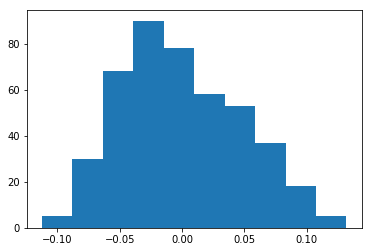

In [20]:
# Ok. So how do we replicate that operation, and why do we do it?
# Before we load the original data, let's look at some distributions to see if they are normal 
# as stated on the tin
# Ok. We are looking at blood pressure. It looks a bit skewed but we would have to read up on hist
# function to be sure of what is being displayed
import matplotlib.pyplot as plt
plt.hist(diabetes.data[:,3])

In [53]:
# Meanwhile, we move on. What we want to work out is how 
# " mean centered and scaled by the standard deviation times n_samples"
# is calculated
# First, load the original data
odata = np.loadtxt("diabetes.tab.txt", delimiter="\t")
print(odata[0:1])
# Let's get the age column (index 0)
# Number of samples
sample_size = odata[0:,1].size
print(sample_size)

[[ 59.       2.      32.1    101.     157.      93.2     38.       4.
    4.8598  87.     151.    ]]
442


In [22]:
# Ok, we have original data, let's compute standard deviation for column 1
# standard deviation
col1_std = np.std(odata[0:,0])
col1_std

13.094190207980025

In [23]:
# our scale factor is then supposed to be standard deviation times n_samples
scale_factor = col1_std * sample_size
scale_factor

5787.632071927172

In [24]:
# Now assuming we divide each observation by the appropriate scale factor,
# in this case column index 0, age, let's see if it matches the supplied data
# in the diabetes dataset
odata[0,0]/scale_factor

0.010194151816626125

In [25]:
diabetes.data[0,0]

0.0380759064334241

In [43]:
# That didn't work. Maybe we forgot to "mean centre" the data.
odmean = np.mean(odata[0:,0])
odmean

48.51809954751131

In [27]:
# next we initialise a new array to hold our mean centered data
odcentered = np.zeros(odata.shape)
# and one to hold the variance values
oddeviation = odcentered

In [56]:
# Now we update each cell mean the deviation (value minus mean) - p
for i in range(0, 442):
    oddeviation[i, 0] = odata[i, 0] - odmean
print("oddeviation[0, 0] = ", oddeviation[0, 0])

oddeviation[0, 0] =  10.481900452488688


In [57]:
oddeviation[0, 0] / scale_factor


0.0018110861786344366

In [30]:
oddeviation[0,1]

0.0

In [31]:
oddeviation.size

4862

In [32]:
# numpy ndarray two-dimentional matrix data-retrieval recap

# first row, first column
print(diabetes.data[0,0])
# first row, second column
print(diabetes.data[0,1])
# second row, first column
print(diabetes.data[1,0])
# second row, second column
print(diabetes.data[1,1])
# first row, all columns
print(diabetes.data[0:1])
# first column, all rows
diabetes.data[:,0]

0.0380759064334241
0.0506801187398187
-0.00188201652779104
-0.044641636506989
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]]


array([ 0.03807591, -0.00188202,  0.08529891, -0.08906294,  0.00538306,
       -0.09269548, -0.04547248,  0.06350368,  0.04170844, -0.07090025,
       -0.09632802,  0.02717829,  0.01628068,  0.00538306,  0.04534098,
       -0.05273755, -0.00551455,  0.07076875, -0.0382074 , -0.02730979,
       -0.04910502, -0.0854304 , -0.0854304 ,  0.04534098, -0.06363517,
       -0.06726771, -0.10722563, -0.02367725,  0.05260606,  0.06713621,
       -0.06000263, -0.02367725,  0.03444337,  0.03081083,  0.01628068,
        0.04897352,  0.01264814, -0.00914709, -0.00188202, -0.00188202,
        0.00538306, -0.09996055, -0.06000263,  0.01991321,  0.04534098,
        0.02717829, -0.05637009, -0.07816532,  0.06713621, -0.04183994,
        0.03444337,  0.05987114, -0.05273755, -0.00914709, -0.04910502,
       -0.04183994, -0.04183994, -0.02730979,  0.04170844,  0.06350368,
       -0.07090025, -0.04183994, -0.02730979, -0.03457486,  0.06713621,
       -0.04547248, -0.00914709,  0.04170844,  0.03807591,  0.01

In [33]:
# first column, all rows, rowcount
diabetes.data[:,0].size

442

In [34]:
# Diabetes row count
diabetes.data.size

4420

In [35]:
diabetes.data.shape

(442, 10)

In [ ]:
# Back to the task at hand, finding how the 